# Final Features extracted 


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


# Dependencies

In [36]:
# %pip install scikit-learn 
# %pip install matplotlib
# %pip install scipy 
# %pip install keras 
# %pip install seaborn
# %pip install tensorflow
# %pip install scikeras
# %pip instlal joblib
# %pip install pydot
# %pip install visualkeras


/bin/bash: /home/sukhmeet/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/0d/d6/dbd0ee154329d4618280c778dee1efcdabb9397c97d79657488b328139da/aggdraw-1.3.18-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.3/993.3 kB 15.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Library Imports 


In [1]:
# import all the required libraries in this place

import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.regularizers import l2

import sklearn.model_selection as model_selection
from sklearn.model_selection import StratifiedKFold

import joblib

import pydot




2023-11-29 04:00:56.138601: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 04:00:56.183885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 04:00:57.047654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Loading  Dataset


## Load from file 1

In [51]:
#Function to load data set
def load_dataset_from_jsonl(file_path, file_idx_start=0,file_idx_end=0,testing = False):
    dataset = []
    
    for i in range(file_idx_start,file_idx_end+1):
        path = file_path
        if not testing:
            path += '_' + str(i)
        path+= '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)

        if not testing:
            print('File name: ', path)
            print('Loading training data: ', len(dataset), end='\n')
    return dataset


FILE_PATH_TRAINING = '../../dataset/ember2018/train_features'
FILE_PATH_TESTING = '../../dataset/ember2018/test_features'


dataset_training = load_dataset_from_jsonl(FILE_PATH_TRAINING,0,5)
dataset_testing = load_dataset_from_jsonl(FILE_PATH_TESTING,testing=True)




File name:  ../../dataset/ember2018/train_features_0.jsonl
Loading training data:  50000
File name:  ../../dataset/ember2018/train_features_1.jsonl
Loading training data:  208158
File name:  ../../dataset/ember2018/train_features_2.jsonl
Loading training data:  336049
File name:  ../../dataset/ember2018/train_features_3.jsonl
Loading training data:  465244
File name:  ../../dataset/ember2018/train_features_4.jsonl
Loading training data:  597426
File name:  ../../dataset/ember2018/train_features_5.jsonl
Loading training data:  800000


In [48]:
print("Training dataset size: ", len(dataset_training))
print("Type of dataset: ", type(dataset_training))
number_of_zero_labels = 0
number_of_one_labels = 0
number_of_negative_one_labels = 0
for data in dataset_training:
    if data['label'] == 0:
        number_of_zero_labels += 1
    elif data['label'] == 1:
        number_of_one_labels += 1
    else:
        number_of_negative_one_labels += 1
print("Number of zero labels: ", number_of_zero_labels)
print("Number of one labels: ", number_of_one_labels)
print("Number of negative one labels: ", number_of_negative_one_labels)

print("Testing dataset size: ", len(dataset_testing))

# print % of zero labels
print("Percentage of zero labels: ", number_of_zero_labels/len(dataset_training)*100)
print("Percentage of one labels: ", number_of_one_labels/len(dataset_training)*100)
print("Percentage of negative one labels: ", number_of_negative_one_labels/len(dataset_training)*100)


Training dataset size:  800000
Type of dataset:  <class 'list'>
Number of zero labels:  300000
Number of one labels:  300000
Number of negative one labels:  200000
Testing dataset size:  200000
Percentage of zero labels:  37.5
Percentage of one labels:  37.5
Percentage of negative one labels:  25.0


## Flattening the json objects


In [ ]:
def extract_features(feature, feature_name, features):
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '_' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

def extract_features_from_dataset_to_dataframe(dataset):
    
    features= {}
    features['label']=[]

    section_names = ['.text', '.data', '.rsrc']
    feature_names = ['size', 'entropy', 'vsize']

    for section in section_names:
        for feature in feature_names:
            features[section +'_' + feature] = []

    features['machine']=[]
    features['subsystem']=[]


    for data in dataset:
        
        if data['label'] == -1:
            continue

        #all sections should be equal to 1    
        section_count_list = {'.text':0, '.data':0, '.rsrc':0}
        for item in data['section']['sections']:
            
            if item['name'] in section_names:
                section_count_list[item['name']]+=1
        
        check = False
        for key,value in section_count_list.items():
            if value!=1:
                check=True
                break
        
        if check:
            continue
            
        feature_names = ['size', 'entropy', 'vsize']
            
        for item in data['section']['sections']:

            if item['name'] in section_names:
                
                for feature in feature_names:
                    val = item[feature] if item[feature]!=None else None
                    features[item['name'] + '_' + feature].append(val)
        
        feature_names = ['general', 'strings']

        for feature in feature_names:
            extract_features(data[feature], feature,features)

        for item in data['header']:
            extract_features(data['header'][item], item,features)
        
        features['machine'].append(data['header']['coff']['machine'])
        features['subsystem'].append(data['header']['optional']['subsystem'])
        
        
        features['label'].append(data['label'])

    df = pd.DataFrame(features)
    print(df['label'].value_counts())
    return df


traning_data = extract_features_from_dataset_to_dataframe(dataset_training)
testing_data = extract_features_from_dataset_to_dataframe(dataset_testing)

In [ ]:
df_training = traning_data
df_testing = testing_data

In [ ]:
df_testing['subsystem'].replace('???','UNKNOWN',inplace=True)
df_training['subsystem'].replace('???','UNKNOWN',inplace=True)

In [ ]:
for column in df_testing.columns:
  print("training",column)
  print(df_training[column].value_counts())
  print('-------\n')
  print("tesinting",column)
  print(df_testing[column].value_counts())
  print()
  print("---------------------------------------------------------------------------------------------------------\n")

# Preprocessing

## Removing null columns from dataframes

In [ ]:
df_training.dropna(how='all', axis=1, inplace=True)
df_testing.dropna(how='all', axis=1, inplace=True)

In [ ]:
df_training.columns,df_testing.columns

## Encoding non integer columns

In [ ]:

columns_to_encode = ['machine', 'subsystem']

df_training = pd.get_dummies(df_training, columns=columns_to_encode)
df_testing = pd.get_dummies(df_testing, columns=columns_to_encode)


In [ ]:
print("In training diff",df_training.columns.difference(df_testing.columns))
print("In testing diff",df_testing.columns.difference(df_training.columns))

## Adding the columns

In [ ]:
for column in df_training.columns.difference(df_testing.columns):
    df_testing[column] = 0  
    
for column in df_testing.columns.difference(df_training.columns):
  df_training[column]= 0
  
df_testing = df_testing[df_training.columns]

In [ ]:
df_training.columns

## Direct load

In [12]:
#load from csv to df
df_training = pd.read_csv('../filtered-data/original/training.csv')
df_testing = pd.read_csv('../filtered-data/original/testing.csv')


In [19]:
df_training['label'].value_counts()

label
0    157725
1    150733
Name: count, dtype: int64

## Data pruning

In [13]:
exclude_columns= [
"machine", "subsystem", "label"
]
threshold = 0.98
for column in df_training.columns:

    if df_training[column].max()>10*df_training[column].median() and df_training[column].max()>10 and all([ not column.startswith(x) for x in exclude_columns]) :
        df_training[column] = np.where(df_training[column]<df_training[column].quantile(threshold), df_training[column], df_training[column].quantile(threshold))


In [ ]:
df_training.describe()

## Log Modification


In [ ]:
x = []
for column in df_training.columns:
  if(df_training[column].nunique() >50):
    print(df_training[column].value_counts())
# print(type(x))
# print(sorted(x))

In [9]:
for column in df_training.columns:
    if df_training[column].nunique()>50 and df_training[column].max() > 10*df_training[column].median():
      print(column)
      df_training[column] = np.log(df_training[column]+1)
      df_testing[column] = np.log(df_testing[column]+1)      
          

.text_size
.text_vsize
.data_size
.data_vsize
.rsrc_size
.rsrc_vsize
general_size
general_vsize
general_exports
general_imports
general_symbols
strings_numstrings
strings_avlength
strings_printables
strings_paths
strings_urls
strings_registry
strings_MZ
optional_major_image_version
optional_minor_image_version
optional_major_linker_version
optional_minor_linker_version
optional_sizeof_code
optional_sizeof_headers
optional_sizeof_heap_commit


In [ ]:
df_training.describe()

## Standardization

In [10]:
# Columns to exclude from standardization
def standardize(df,df_train_fit):
    scaler = StandardScaler()
    exclude_columns= [
    "machine", "subsystem", "label"
    ]

    df_standardized = df.copy()

    for column in df.columns:
        if all([ not column.startswith(x) for x in exclude_columns]):
            # Standardize the column
            scaler = scaler.fit(df_train_fit[column].values.reshape(-1, 1))
            df_standardized[column] = scaler.transform(df[column].values.reshape(-1, 1))

    return df_standardized

df_training_standardized = standardize(df_training,df_training)
df_testing_standardized = standardize(df_testing,df_training)

In [ ]:
df_training_standardized.describe()

## Saving to csv 

In [ ]:
# df_training.to_csv('../filtered-data/original/training.csv',index= False)
# df_testing.to_csv('../filtered-data/original/testing.csv',index= False)
df_training_standardized.to_csv('../filtered-data/standardizedv2/training.csv',index= False)
df_testing_standardized.to_csv('../filtered-data/standardizedv2/testing.csv',index= False)

In [23]:
df_training_standardized['label'].value_counts()

label
0    157725
1    150733
Name: count, dtype: int64

In [24]:
df_testing_standardized['label'].value_counts()

label
0    57489
1    52790
Name: count, dtype: int64

In [ ]:

# for column_name in df_training.columns:
#     print(column_name)
print(df_training.columns.difference(df_testing.columns))
print(df_testing.columns.difference(df_training.columns))

print(df_training_standardized.columns.difference(df_testing_standardized.columns))
print(df_testing_standardized.columns.difference(df_training_standardized.columns))

# Column distributions

In [ ]:
print("Training",df_training.var(),sep = "\n")

In [ ]:
df_training.describe()

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


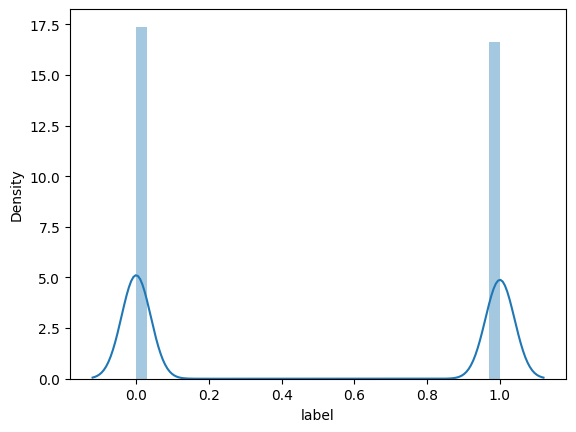

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


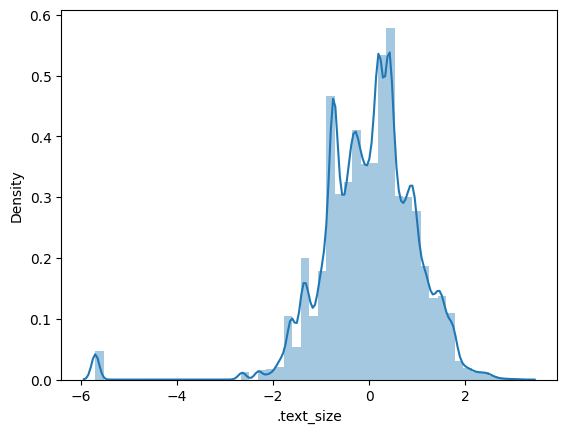

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


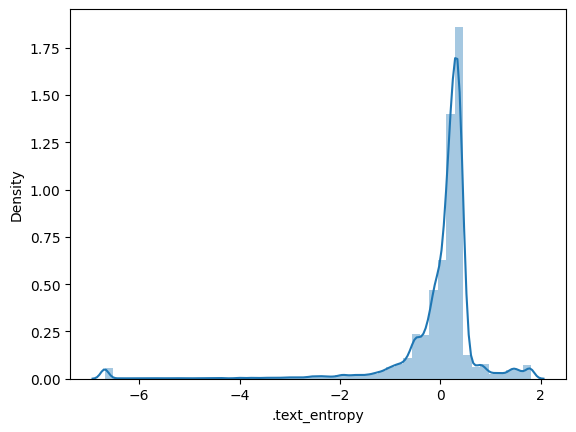

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


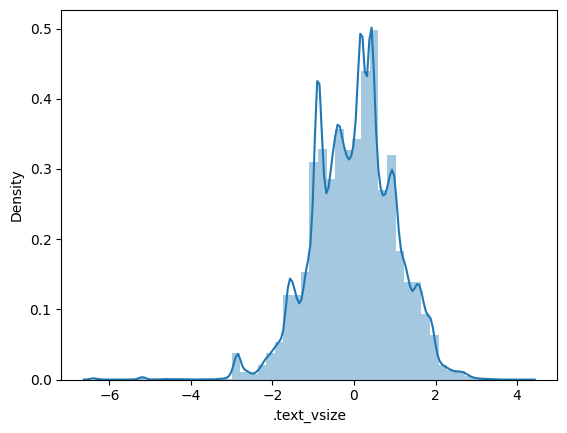

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


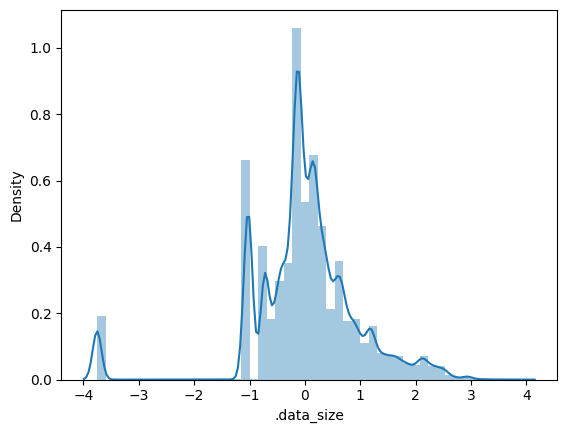

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


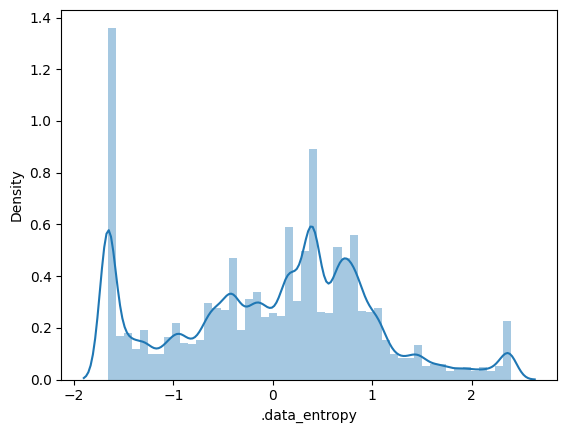

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


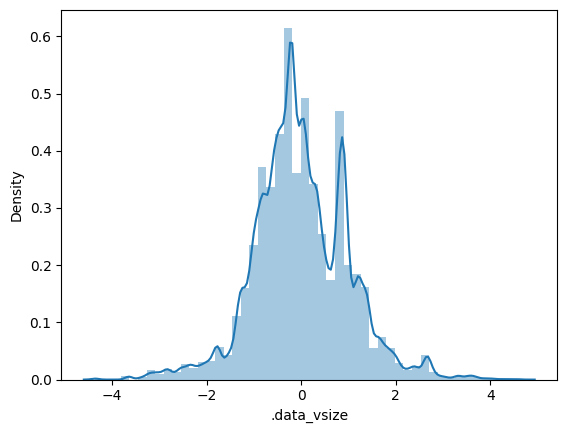

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


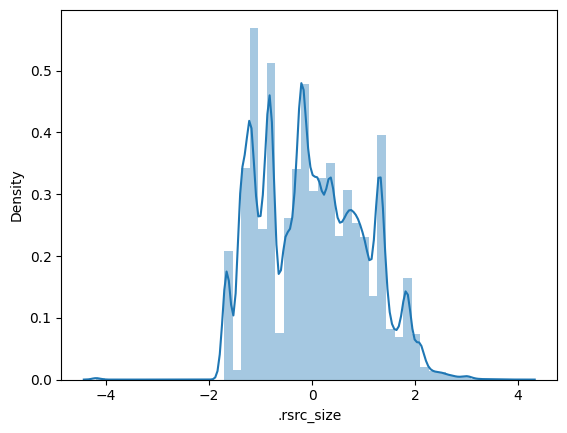

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


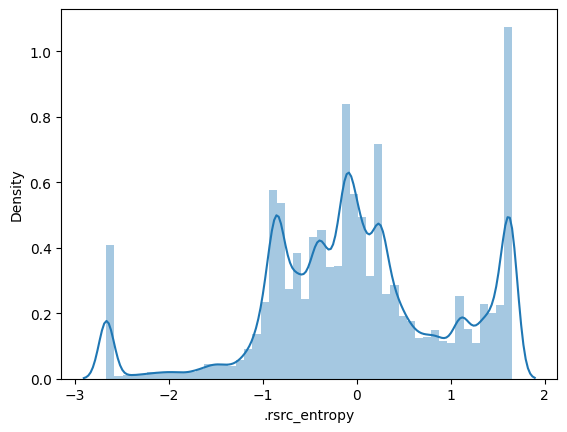

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


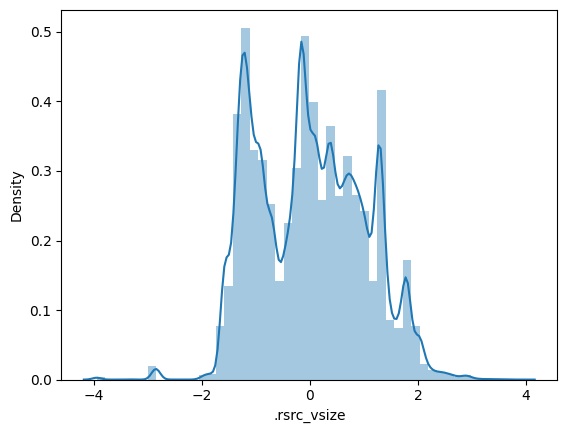

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


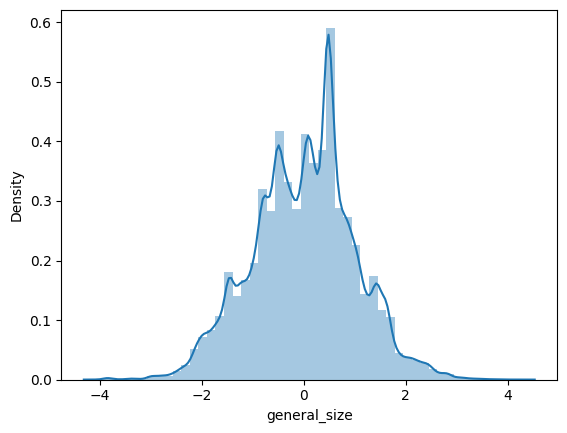

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


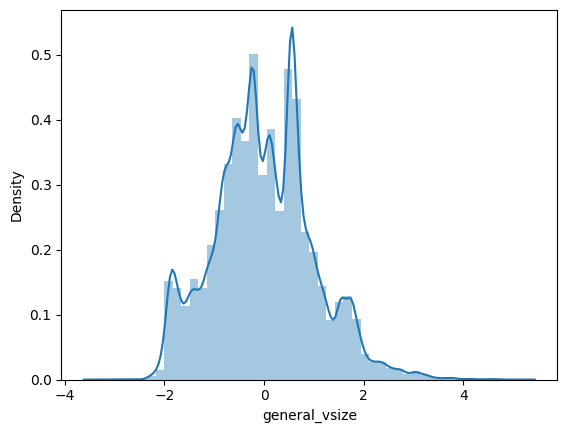

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


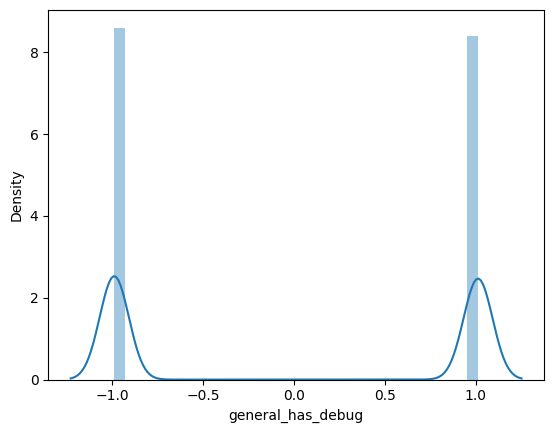

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


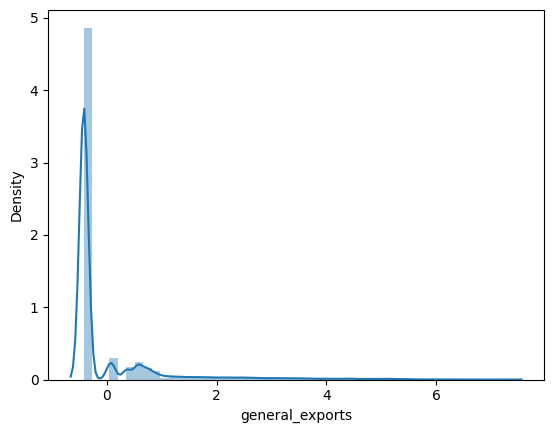

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


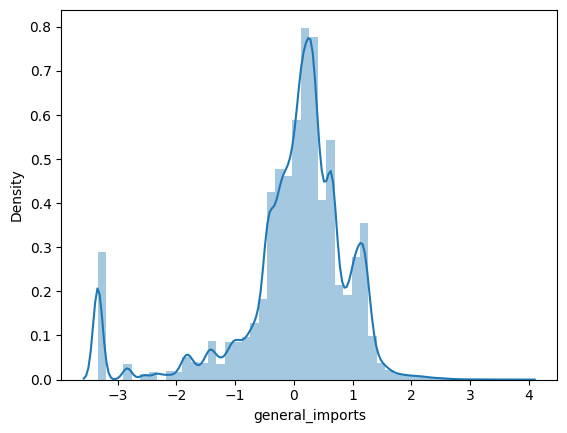

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


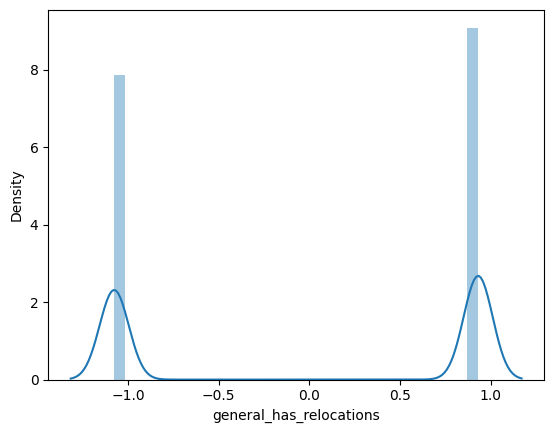

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


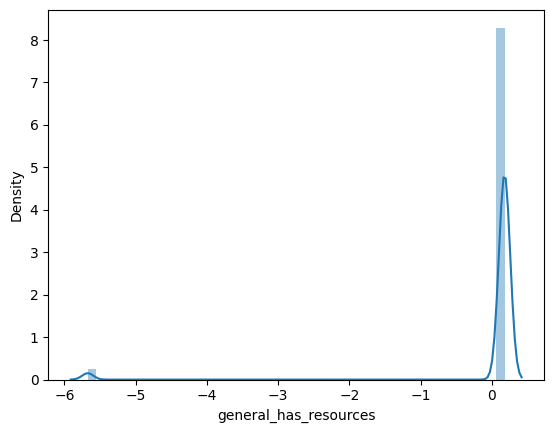

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


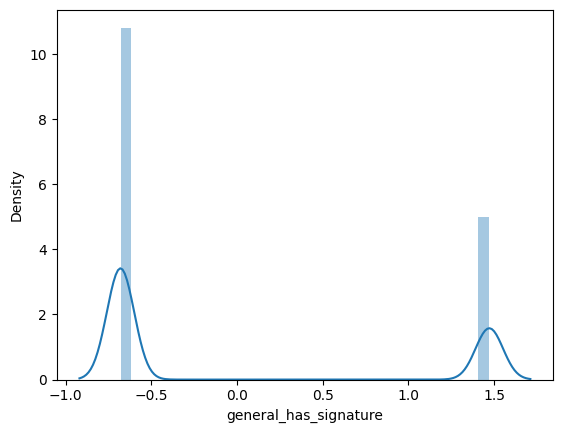

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


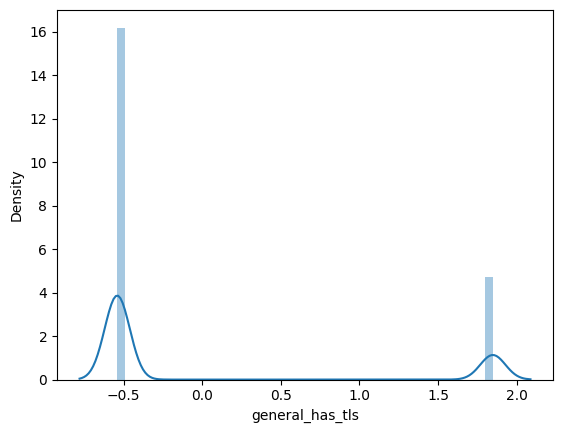

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


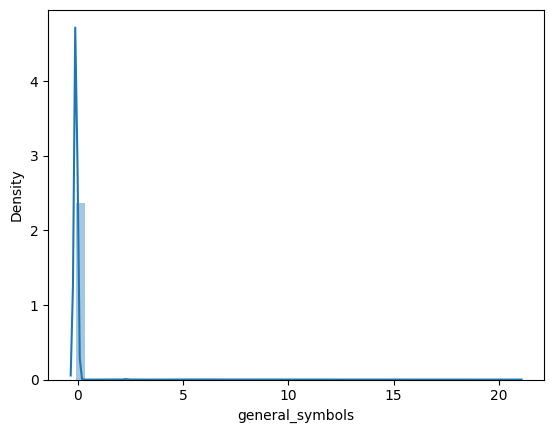

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


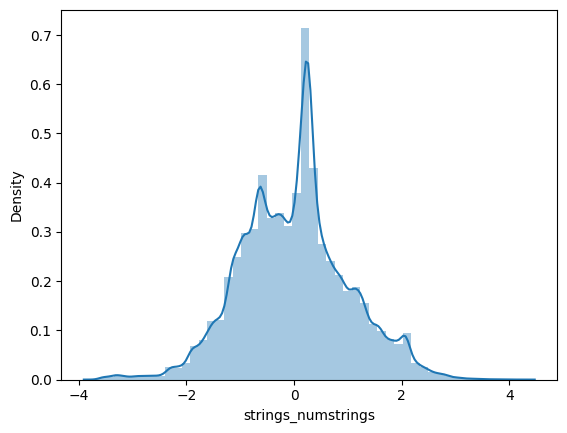

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


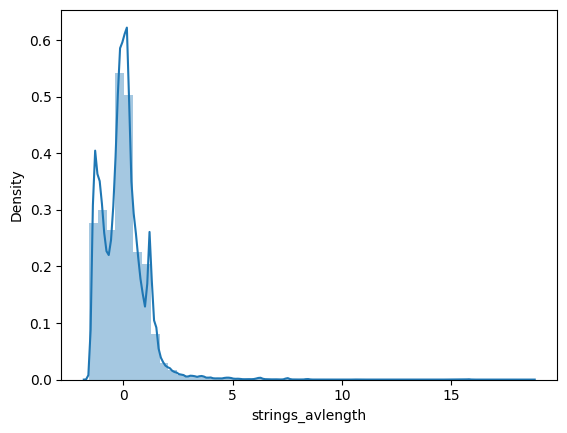

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


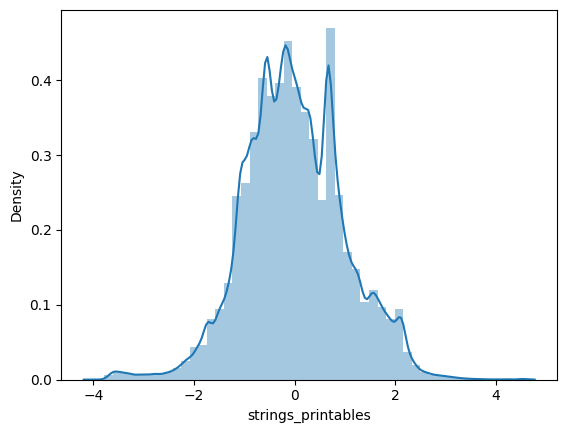

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


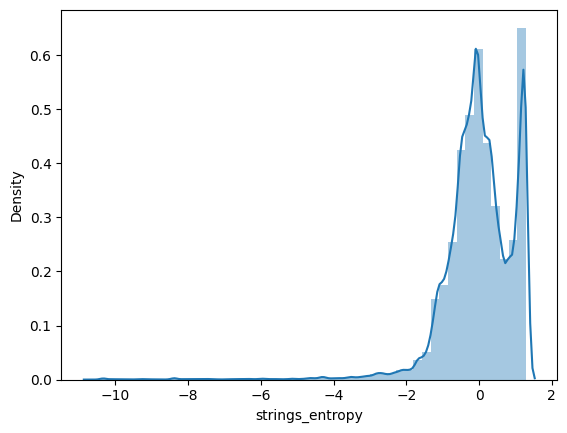

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


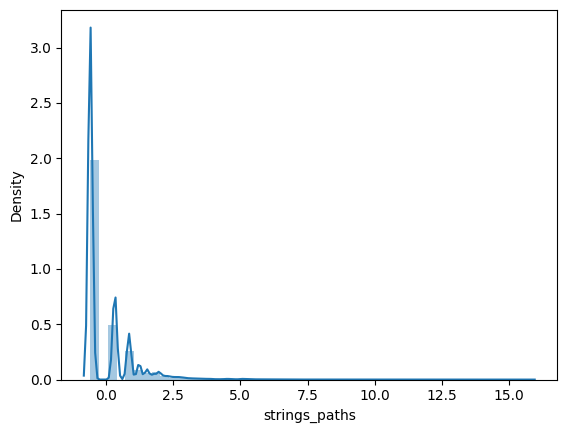

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


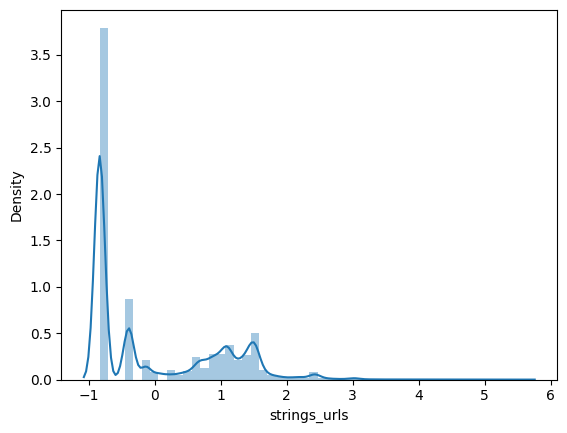

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


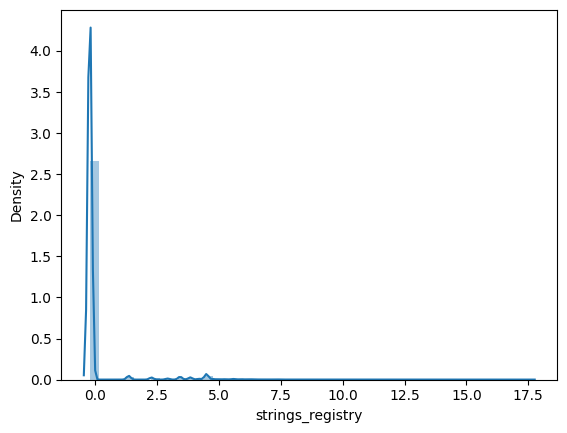

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


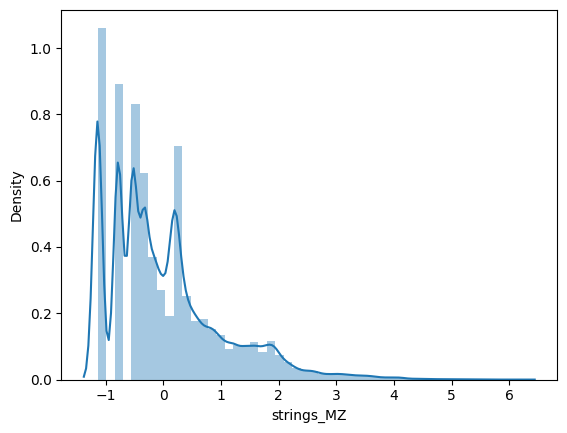

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


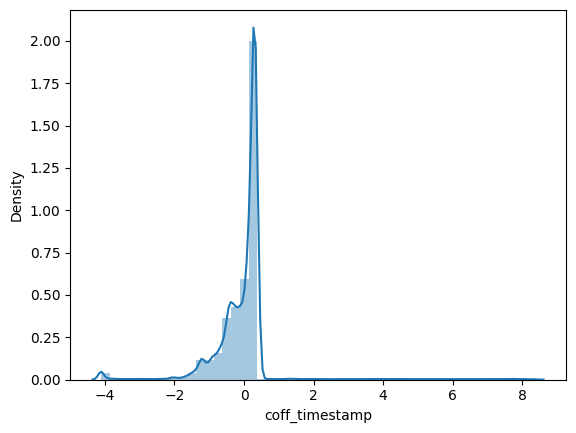

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


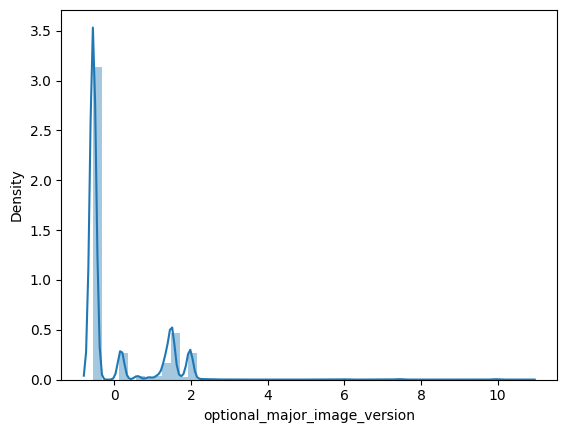

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


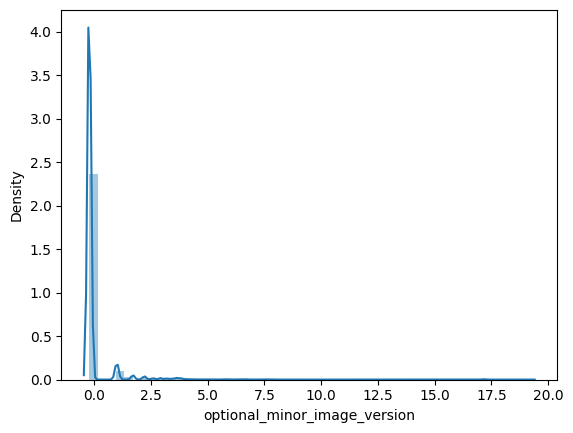

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


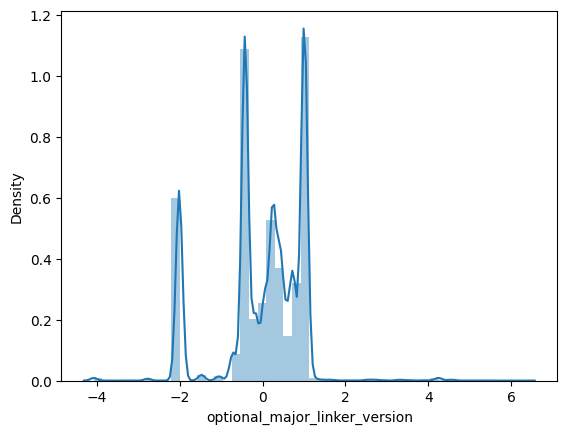

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


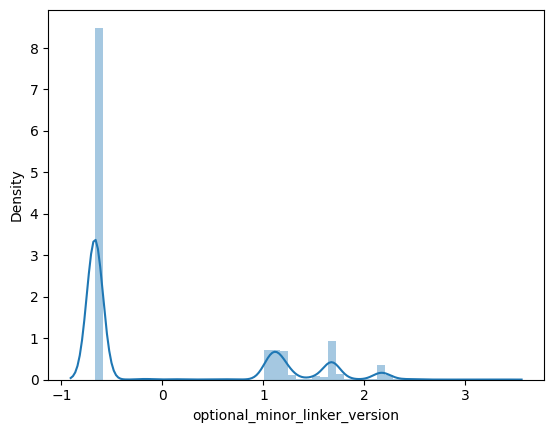

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


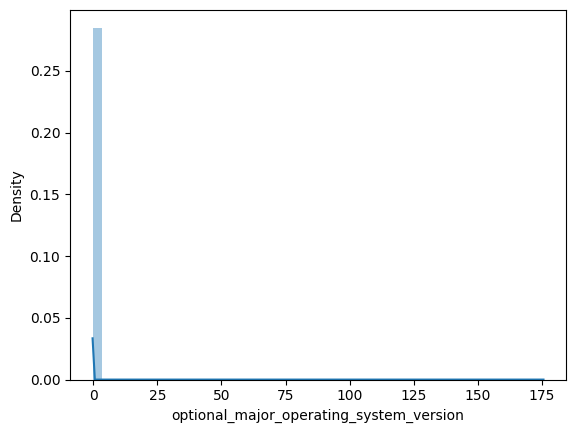

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


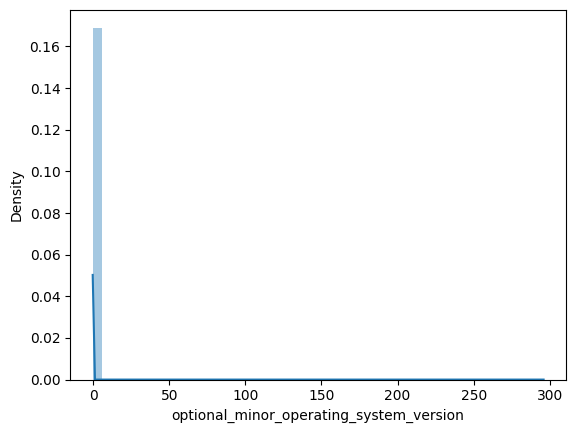

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


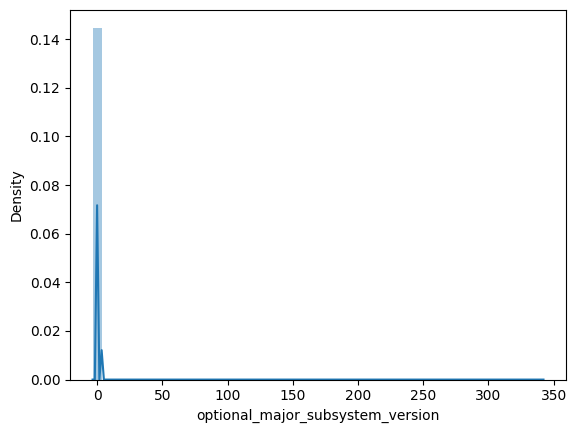

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


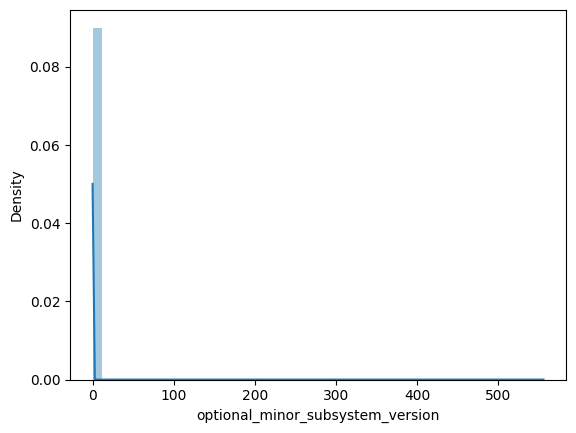

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


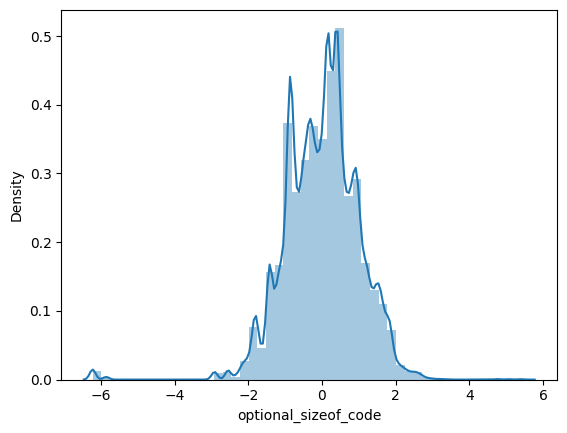

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


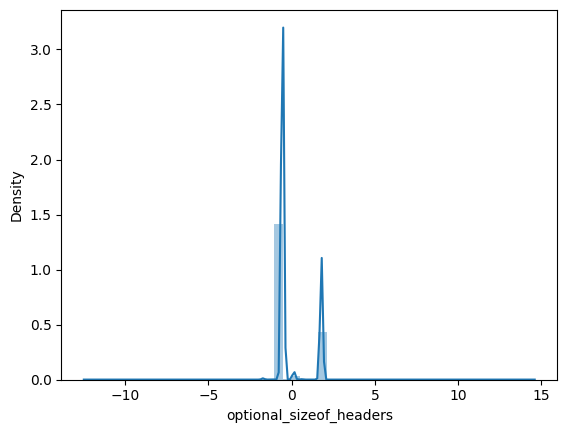

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


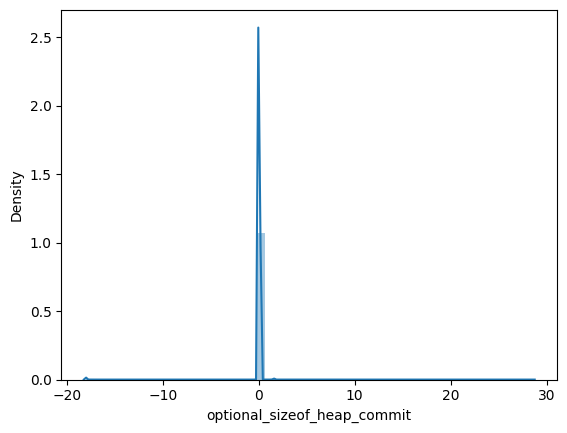

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


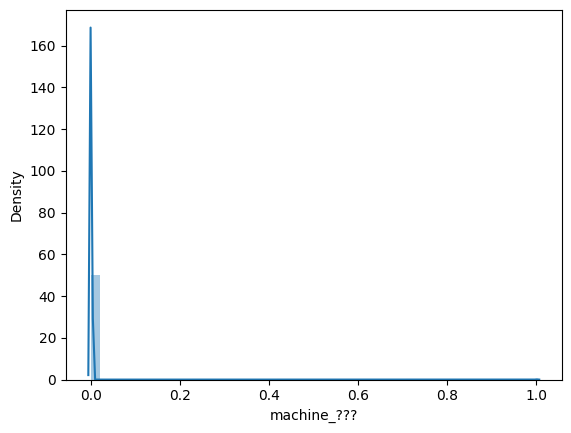

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


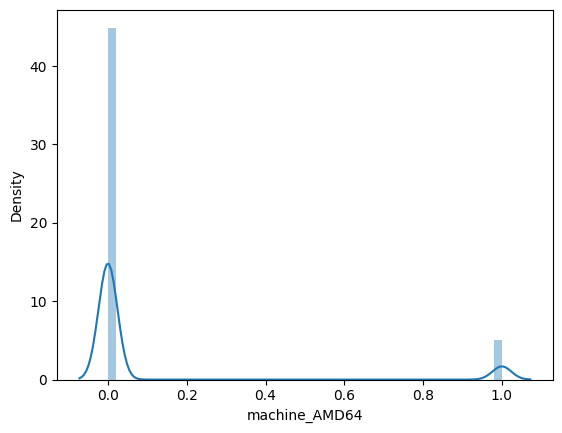

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


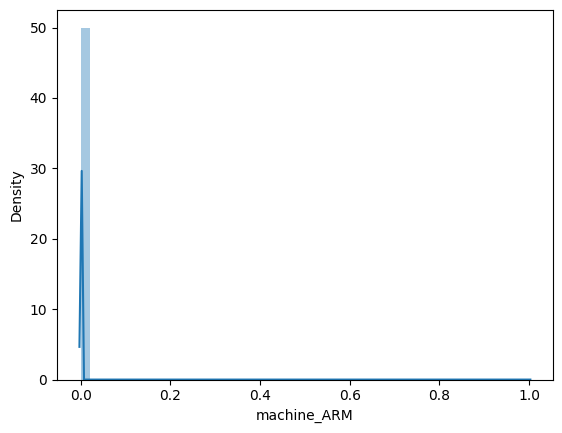

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


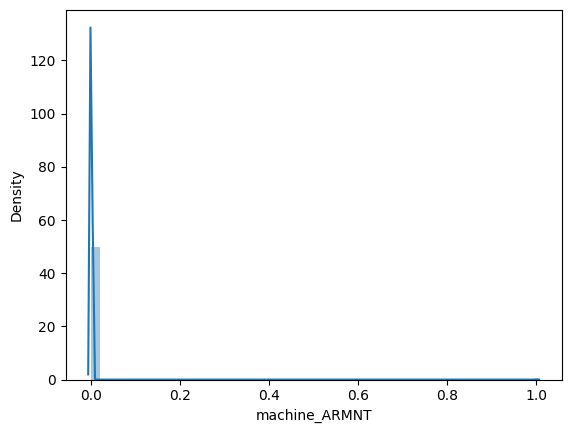

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


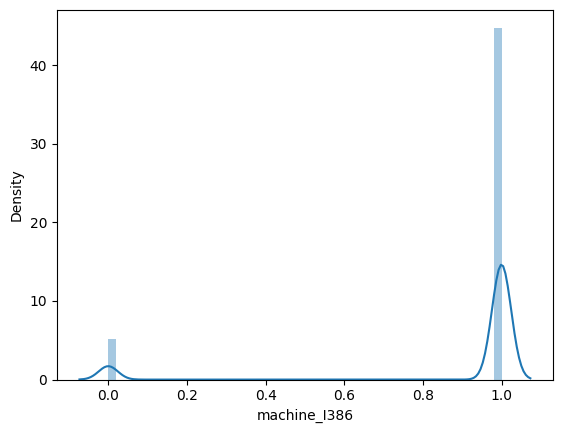

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


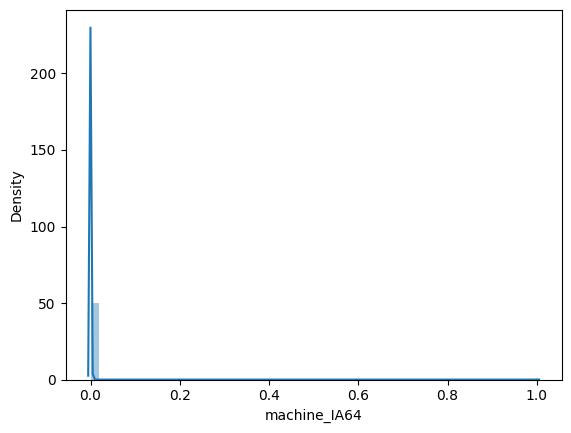

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


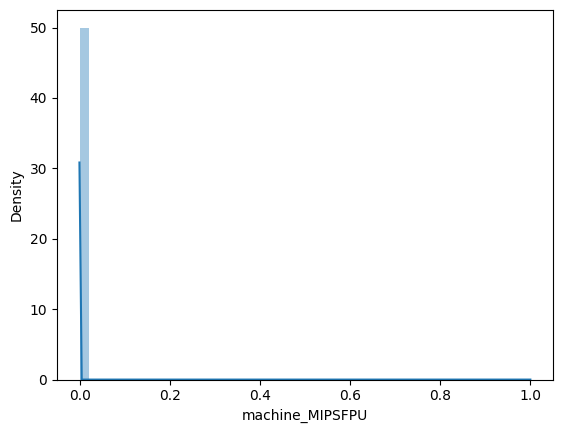

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


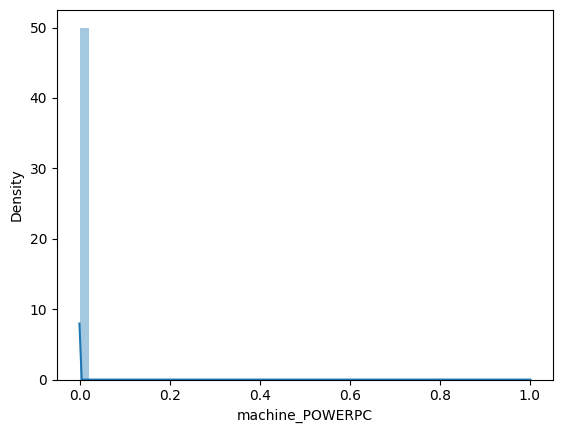

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


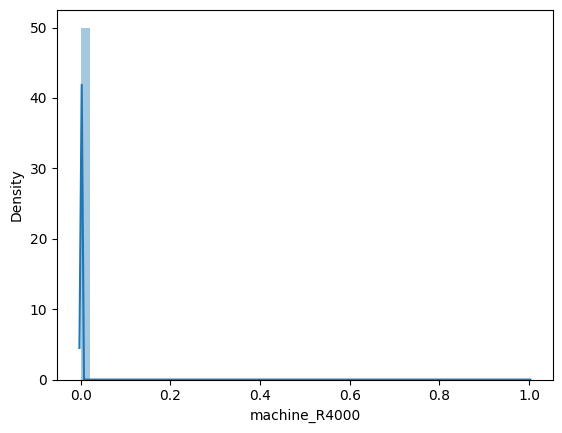

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


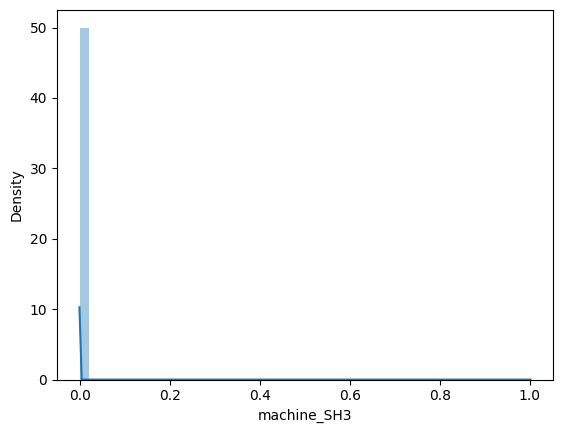

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


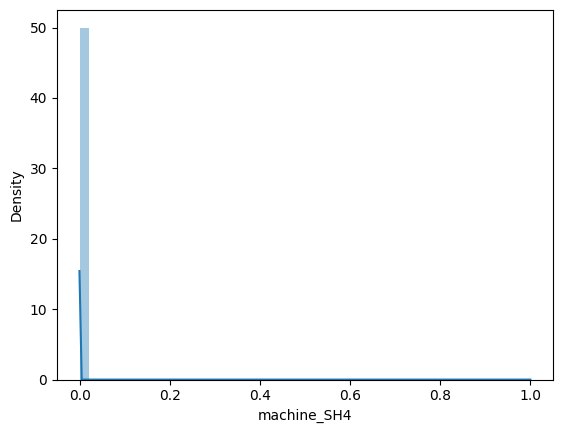

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


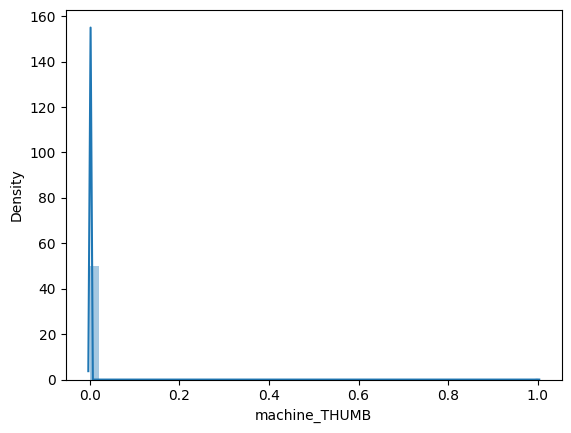

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


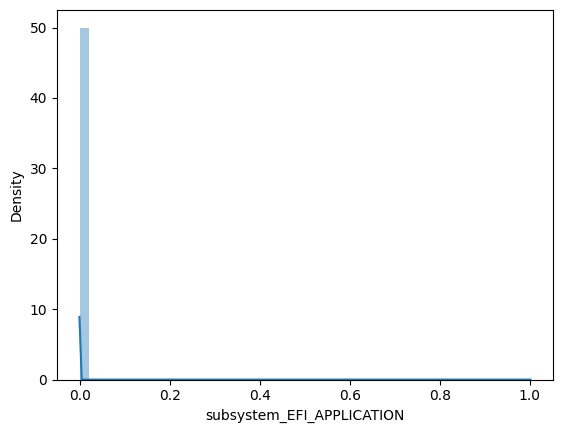

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


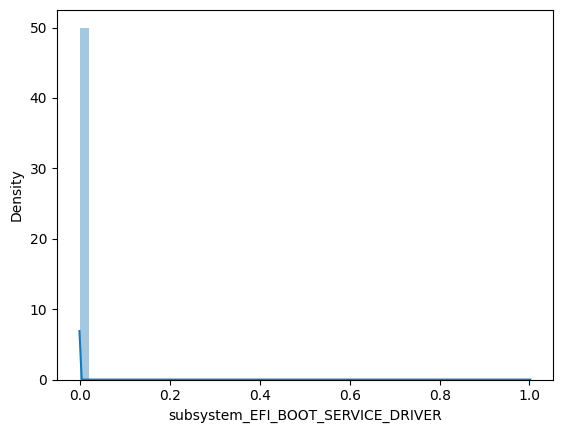

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


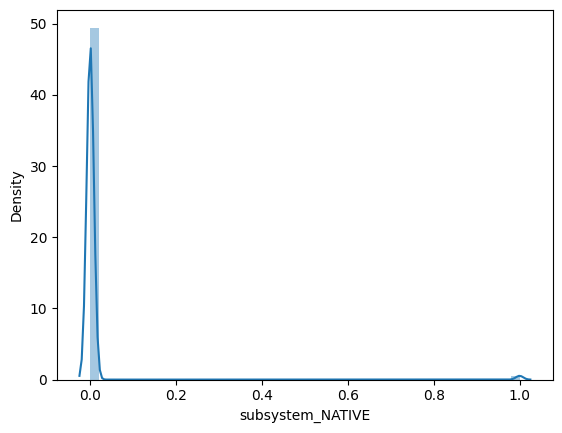

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


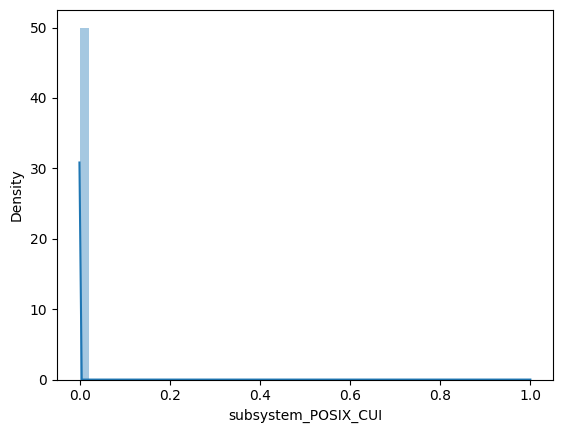

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


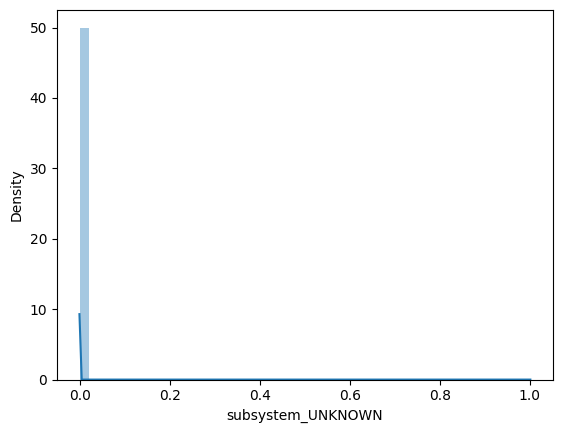

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


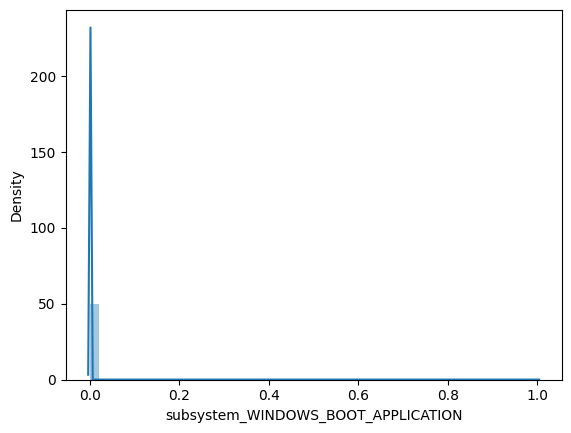

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


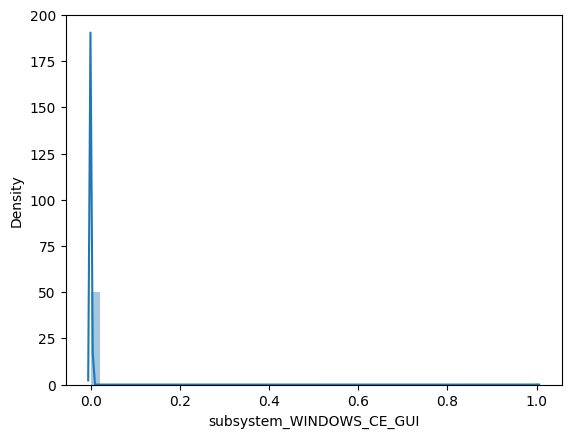

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


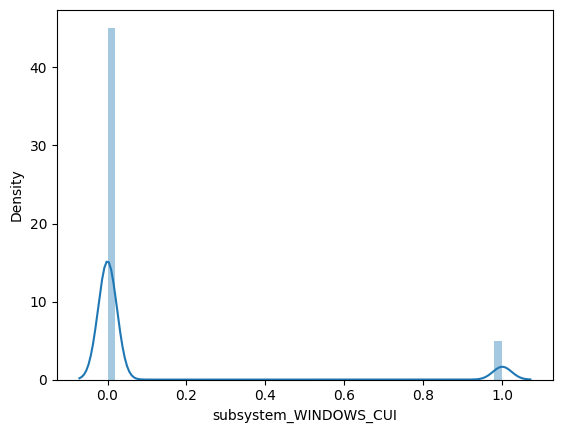

/tmp/ipykernel_7656/3831127953.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


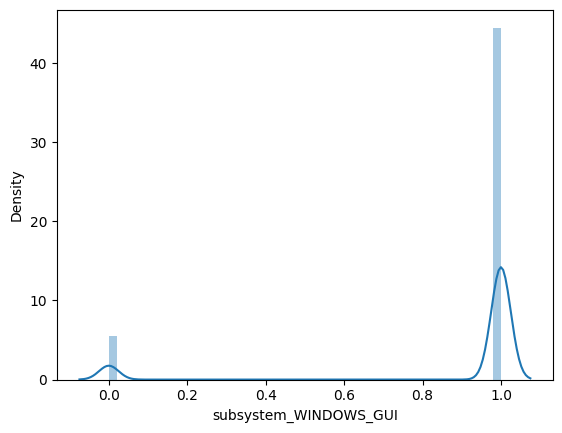

In [15]:
#plot normal distribution of features
def plot_normal_distribution(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
        
plot_normal_distribution(df_training_standardized)

In [ ]:


for column in df_training.columns:
    sns.boxplot(df_training[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Training and Testing Data Split

## Load from CSV

In [2]:
#load from csv to df
df_training_standardized = pd.read_csv('../filtered-data/standardizedv2/training.csv')
df_testing_standardized = pd.read_csv('../filtered-data/standardizedv2/testing.csv')


In [54]:
df_testing_standardized['label'].value_counts()

label
0    57489
1    52790
Name: count, dtype: int64

In [4]:
key = 'machine'
pd.set_option('display.max_columns', 5)
print(df_testing_standardized.loc[0:,[column  for column in df_testing_standardized.columns if key in column]].transpose())
pd.reset_option('max_columns')
# print([column  for column in df_testing_standardized.columns if key in column])

                0      1       ... 110277 110278
machine_???      False  False  ...  False  False
machine_AMD64    False  False  ...  False  False
machine_ARM      False  False  ...  False  False
machine_ARMNT    False  False  ...  False  False
machine_I386      True   True  ...   True   True
machine_IA64     False  False  ...  False  False
machine_MIPSFPU      0      0  ...      0      0
machine_POWERPC  False  False  ...  False  False
machine_R4000    False  False  ...  False  False
machine_SH3      False  False  ...  False  False
machine_SH4          0      0  ...      0      0
machine_THUMB    False  False  ...  False  False

[12 rows x 110279 columns]


## With val

In [42]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_val = X_val.astype(np.float32)



## No val

In [3]:
def train_test_split_from_dataframe(df_training, df_testing):
    y_train = df_training['label']
    X_train = df_training.drop('label', axis=1)

    y_test = df_testing['label']
    X_test = df_testing.drop('label', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_from_dataframe(df_training_standardized, df_testing_standardized)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246766, 32), (246766,), (110279, 32), (110279,))

In [ ]:
print("In training diff",X_train.columns.difference(X_test.columns))
print("In testing diff",X_test.columns.difference(X_train.columns))

In training diff Index([], dtype='object')
In testing diff Index([], dtype='object')


# PCA

In [4]:
max_variance_to_explain = 0.98

pca = PCA(max_variance_to_explain)
pca.fit(X_train)
pca_data = pca.transform(X_train)

In [5]:
X_train.shape

(246766, 60)

In [6]:
pca_data.shape

(246766, 32)

## Graphs

### Bar graph

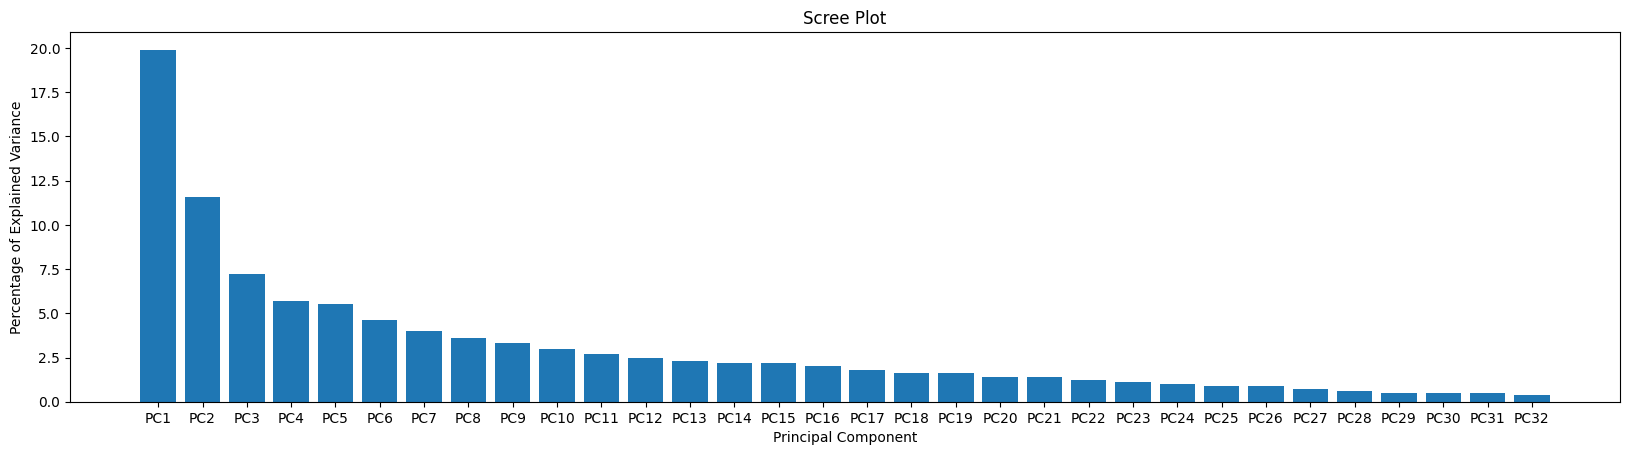

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var = [x for x in per_var if x >0.0]
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure().set_figwidth(20)
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


### Top columns

In [8]:
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
columns_req = 20
 
top_columns = sorted_loading_scores[0:columns_req].index.values
print(top_columns)
print(loading_scores[top_columns])

['general_size' 'strings_numstrings' 'strings_printables' 'general_vsize'
 '.text_vsize' 'optional_sizeof_code' '.text_size' 'general_imports'
 'strings_MZ' '.rsrc_vsize' '.rsrc_size' '.data_size' 'general_has_tls'
 '.data_vsize' '.data_entropy' 'strings_urls' '.rsrc_entropy'
 'general_has_signature' 'strings_entropy' 'general_has_relocations']
general_size              -0.309546
strings_numstrings        -0.304708
strings_printables        -0.303223
general_vsize             -0.286908
.text_vsize               -0.266079
optional_sizeof_code      -0.259980
.text_size                -0.241698
general_imports           -0.234729
strings_MZ                -0.214870
.rsrc_vsize               -0.211028
.rsrc_size                -0.210926
.data_size                -0.189090
general_has_tls           -0.180491
.data_vsize               -0.163761
.data_entropy             -0.154249
strings_urls              -0.152213
.rsrc_entropy             -0.144902
general_has_signature     -0.112240
strin

## Transforming

In [9]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
try:
  X_val = pca.transform(X_val)
except:
  pass

In [10]:
X_train.shape,X_test.shape,X_val.shape

((246766, 32), (110279, 32), (61692, 32))

# Random Forest Classifier  

In [6]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    5.0s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [8]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(y_pred)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


Accuracy: 0.9357901323008007
[0 1 0 ... 1 1 0]


[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.3s finished


## Graphs

### Confusion matrix

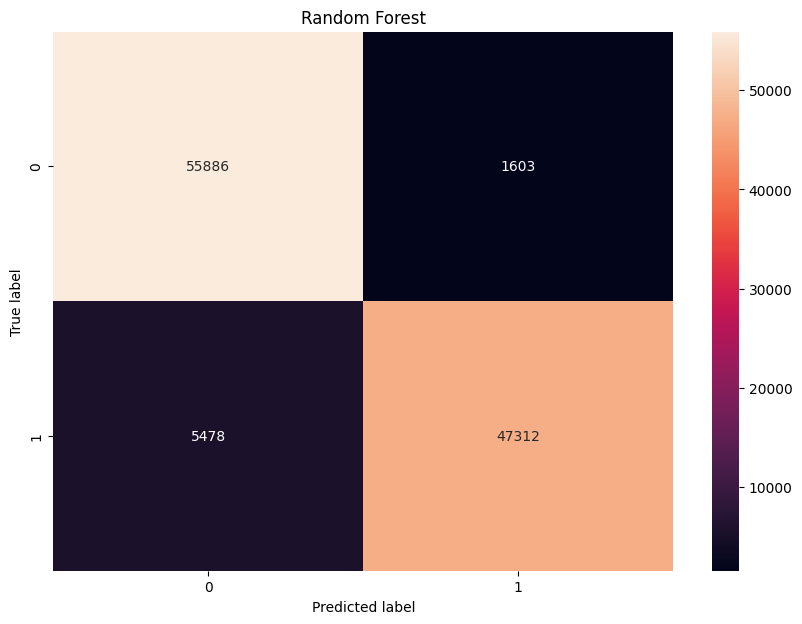

In [9]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred, labels=[0, 1], title='Random Forest')

In [ ]:
feature_importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances}).sort_values('importance', ascending = False)
# plot feature importances
plt.figure(figsize = (8, 6))
sns.barplot(x = 'importance', y = 'feature', data = feature_importances)
plt.title('Feature Importances')
plt.show()

In [ ]:
# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have defined rf and your data (X_train, y_train)
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf, title, X_train, y_train, cv=5, n_jobs=68)
plt.show()


# Base Model Class

## Base class

In [ ]:

class Model:
  
  def __init__(self):
    self.model = Sequential()
  
  def addInputLayer(self,input_dim):
    self.model.add(Input(shape=(input_dim,)))
  
  def __addLayer(self,perceptrons,activation,dropout,regularizer):
    if regularizer != 0:
      self.model.add(Dense(perceptrons,activation=activation,kernel_regularizer=regularizers.l2(regularizer)))
    else:
      self.model.add(Dense(perceptrons,activation=activation))
    
    if(dropout !=0):
      self.model.add(Dropout(dropout))

  
  def addLayers(self,layers, activation_functions,dropouts=[],regularizers=[]):
    while len(regularizers) < len(layers):
      regularizers.append(0)
    while len(activation_functions) < len(layers):
      activation_functions.append('sigmoid')
    
    while(len(dropouts)< len(layers)):
      dropouts.append(0)
    for (perceptrons,activation,dropout,regularizer) in zip(layers,activation_functions,dropouts,regularizers):
      self.__addLayer(perceptrons,activation,dropout,regularizer)
    
  def compile(self):
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], weighted_metrics=[])
    
  def get_model(self):
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], weighted_metrics=[])
    return self.model
  
  # def fit(self,X_train=X_train, y_train=y_train, epochs=100, batch_size=2048, validation_data=(X_val, y_val)):
  #   self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=1)
    
  # def predict(self,X_test= X_test,y_test = y_test):
  #   y_pred = self.model.predict(X_test)
  #   y_pred_real = [int(round(x[0])) for x in y_pred]
  #   y_pred_real = np.array(y_pred_real)
  #   return y_pred_real
  
  def show(self):   
    print(self.model.summary())
    tf.keras.utils.plot_model(self.model, show_shapes=True,show_layer_names=False)
    

In [ ]:

layers = [50,25,12,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
model_1 = Model()
model_1.addInputLayer(X_train.shape[1])
model_1.addLayers(layers,activations,dropouts,regularizers_1)
model_1.compile()
model_1.fit()


In [ ]:
y_pred = model_1.model.predict(X_test)

y_pred_real = [int(round(x[0])) for x in y_pred]
y_pred_real = np.array(y_pred_real)

accuracy_score(y_test, y_pred_real)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix')

In [ ]:
#get training loss
def plot_loss_curves(history):
  train_loss = history.history['loss']
  #get validation loss
  val_loss = history.history['val_loss']
  #plot graph

  plt.plot(train_loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend()
  plt.show()


# K Fold

## fit

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
models = []

layers = [100,100,100,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = [0.2,0.2,0.2]
regularizers_1 = [0.01,0.01]
for i in range(10):
    model_1 = Model()
    model_1.addInputLayer(X_train.shape[1])
    model_1.addLayers(layers,activations,dropouts,regularizers_1)
    model_1.compile()
    models.append(model_1)
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    
    x_train_fold, x_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    models[i].fit(x_train_fold,y_train_fold,validation_data=(x_val_fold,y_val_fold))
    i+=1

  

In [ ]:
list1 = [2, 2, 2, 3, 4]
list2 = [2, 2, 3, 4, 4]
list3 = [1, 2, 3, 4, 4]
list4 = [2, 2, 3, 4, 4]

# Create a NumPy array from the lists
lists_array = np.array([list1, list2, list3,list4])

# Use NumPy to find the mode (most frequent element) for each index
max_freq_elements = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=lists_array)

# max_freq_elements now contains the element with the maximum frequency for each index
print(max_freq_elements)

## Graph

In [ ]:
y_pred_list =[]
for i,model in enumerate(models):
  y_pred_list.append(model.predict(X_test,y_test))
  print(accuracy_score(y_test,y_pred_list[-1]))
  plot_confusion_matrix(y_test, y_pred_list[-1], labels=[0, 1], title='Confusion matrix_' +str(i))
  plot_loss_curves(model.history)

y_pred_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_pred_list)

print(accuracy_score(y_test,y_pred_final))

  

In [ ]:
print(accuracy_score(y_test,y_pred_final))
plot_confusion_matrix(y_test, y_pred_final, labels=[0, 1], title='Confusion matrix K fold')


In [ ]:
print(classification_report(y_test,y_pred_final))

# MODEL2 - Bagging

## Model

In [ ]:
layers = [64,8,4,1]
activations = ['relu','relu','relu','sigmoid']
dropouts = []
regularizers_1 = [0.01,0.01,0.01]
max_features = math.ceil(math.sqrt(X_train.shape[1]))+10


def get_model():
  model = Model()
  model.addInputLayer(max_features)
  model.addLayers(layers,activations,dropouts,regularizers_1)
  model.show()
  return model.get_model()

model= KerasClassifier(model=get_model, epochs=100, batch_size=512,random_state=42,verbose=1,validation_split=0.2)

bagg = BaggingClassifier(estimator=model,n_estimators=50,max_features = max_features,verbose =1,random_state=42,max_samples=4096,n_jobs=-1)

## fit

In [ ]:
bagg.fit(X_train,y_train)

## predict

In [ ]:
y_pred = bagg.predict(X_test)

## Graph


In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix Adaboost')



# Model 1 - Basic ANN

In [64]:
X_train.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

## Model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 100)               3300      
                                                                 
 dropout_36 (Dropout)        (None, 100)               0         
                                                                 
 layer_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 layer_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13501 (52.74 KB)
Trainable params: 13501 (52.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None


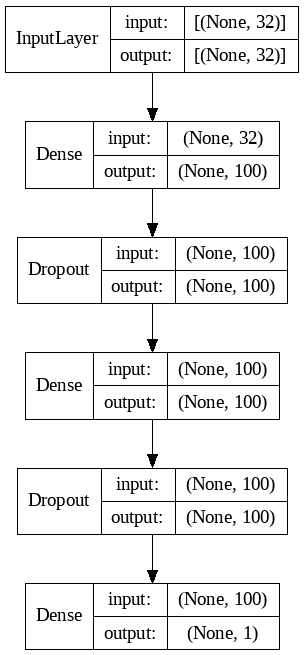

In [32]:
# write a ann model to classify 
from sklearn.metrics import roc_curve, auc, roc_auc_score

def get_model():
    hidden_layers_neur=100
    hidden_layers=3
    # model = Sequential(name="Artificial Neural Network")
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    # model.add(Dropout(0.2))
    for layer_id in range(hidden_layers-1):
        model.add(Dense(hidden_layers_neur, activation='relu', kernel_regularizer=regularizers.l2(0.01),name = 'layer_'+str(layer_id)))
        model.add(Dropout(0.2))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid',name = 'layer_'+str(hidden_layers-1)))
    return model


model = get_model()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=False)






## Compile and fit


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
#validation accuracy chart



history = model.fit(X_train, y_train, epochs=50, batch_size=2024, validation_data=(X_val, y_val), verbose=1)



Epoch 1/50


TypeError: in user code:

    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


## Save

In [ ]:

# save model
model.save('../model/ember_model_ann_pca_100.h5')

## Predict

In [84]:

y_pred = model.predict(X_test)



   1/3447 [..............................] - ETA: 3:20

3447/3447 [==============================] - 3s 820us/step


In [85]:
X_test.shape

(110279, 32)

In [86]:
threshold = 0.5
y_pred_real = np.where(y_pred >threshold,1,0)
y_pred_real = np.array(y_pred_real)

In [87]:
y_test.shape, y_pred.shape,y_pred_real.shape

((110279,), (110279, 1), (110279, 1))

## Accuracy

In [88]:
# find accuracy of the model
accuracy_score(y_test, y_pred_real)

0.8439412762175935

In [89]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')


  46/3447 [..............................] - ETA: 3s - loss: 3.8250 - accuracy: 0.8546  

3447/3447 [==============================] - 4s 1ms/step - loss: 1.8250 - accuracy: 0.8439
Accuracy: 0.8439412713050842
Loss: 1.825006365776062


## Graphs

### ROC and AUC

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

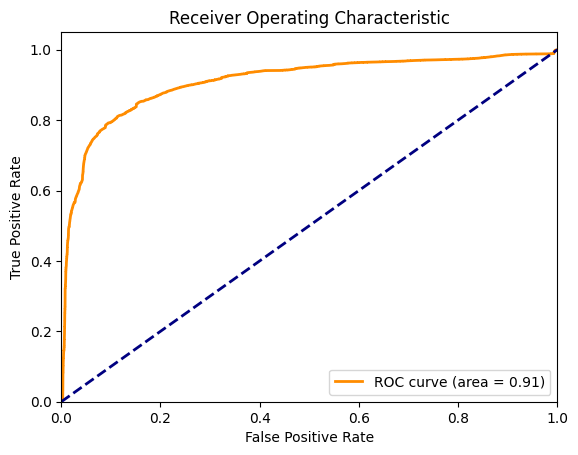

AUC Score: 0.9090343143500498


In [91]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

### Confusion Matrix

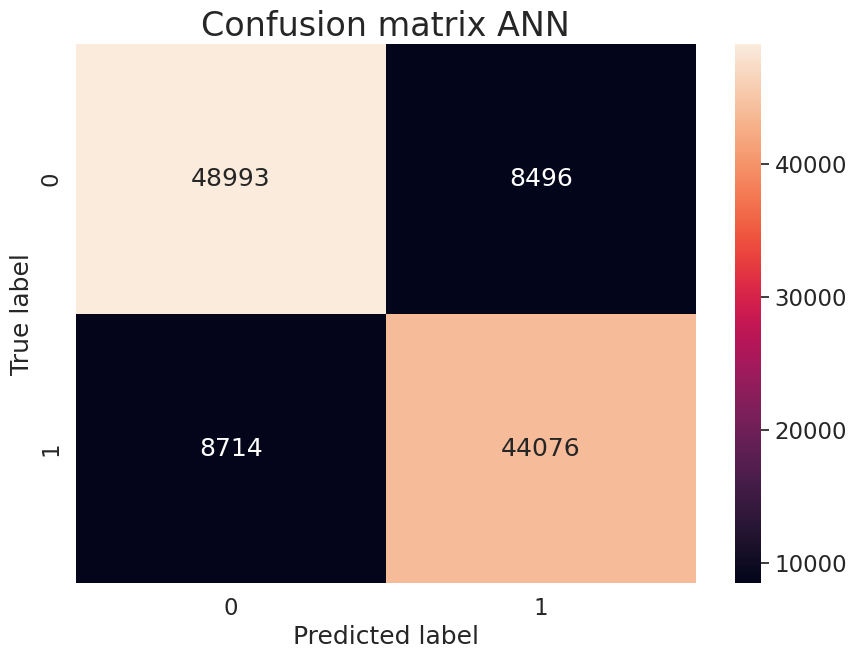

In [97]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    # increase font size
    sns.set(font_scale=2)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix ANN')

In [95]:
# print classification report
print(classification_report(y_test, y_pred_real))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     57489
           1       0.84      0.83      0.84     52790

    accuracy                           0.84    110279
   macro avg       0.84      0.84      0.84    110279
weighted avg       0.84      0.84      0.84    110279



### Default Validation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


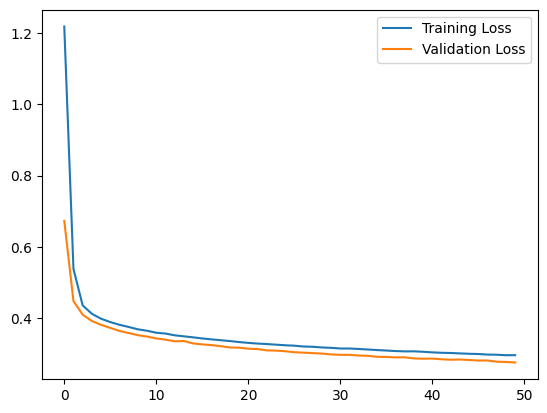

In [93]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
train_accurary = history.history['accuracy']
#get validation data
val_loss = history.history['val_loss']
val_accurary = history.history['val_accuracy']

#plot graph
# plt.figure().set_figwidth(7)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')


plt.legend()
plt.show()


## F1 scores and somethings

In [94]:
# Confusion matrix
confusion_matrix_output = confusion_matrix(y_test, y_pred_real, labels=[0, 1])

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP = confusion_matrix_output[1, 1]
TN = confusion_matrix_output[0, 0]
FP = confusion_matrix_output[0, 1]
FN = confusion_matrix_output[1, 0]

print(TP)


# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall (sensitivity)
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

# Calculate MCC with overflow handling
numerator = (TP * TN - FP * FN)
denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Avoid division by zero and handle overflow/underflow
if denominator == 0:
    mcc = 0  # Handle division by zero
else:
    mcc = numerator / denominator

# Print the calculated MCC
# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


44076
Accuracy: 0.8439
Precision: 0.8384
Recall (Sensitivity): 0.8349
F1-Score: 0.8367
Specificity (True Negative Rate): 0.8522


In [22]:
print(classification_report(y_test,y_pred_real))
print(accuracy_score(y_test,y_pred_real))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     57489
           1       0.82      0.89      0.85     52790

    accuracy                           0.85    110279
   macro avg       0.86      0.86      0.85    110279
weighted avg       0.86      0.85      0.85    110279

0.8547592923403368


## Parameter Search (Grid)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras_tuner.tuners import RandomSearch

# Define a function to build your model
def build_model(hp):
    model = keras.Sequential()
    
    # Define a tunable hyperparameter for the number of units in the first layer
    hp_units = hp.Int('units', min_value=100, max_value=200, step=32)
    
    model.add(layers.Dense(units=hp_units, input_dim=X_train.shape[1], activation='relu'))
    
    # Define a tunable hyperparameter for the number of hidden layers
    hp_layers = hp.Int('num_layers', min_value=3, max_value=10)
    
    # Add hidden layers with tunable number of units
    for i in range(hp_layers):
        model.add(layers.Dense(units=hp_units, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model with a tunable learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Initialize the tuner (RandomSearch in this case)
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,  # Number of hyperparameter combinations to try
    directory='my_tuner_dir',  # Directory to save the search results
    project_name='my_ann_hyperparameeter_search'  # Name of the tuning project
)

# Decrease the batch size
batch_size = 1024

# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=10,  # You can adjust the number of epochs
             validation_data=(X_val, y_val),
             batch_size=batch_size)  # Provide your validation data

# Get the best hyperparameters and build the final model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the final model with the best hyperparameters
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=batch_size)

# Evaluate the final model on your test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

# Print the best hyperparameters
print("Best hyperparameters:")
print(best_hyperparameters)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")


Using TensorFlow backend
Reloading Tuner from my_tuner_dir/my_ann_hyperparameeter_search/tuner0.json
Epoch 1/100
241/241 [==============================] - 6s 21ms/step - loss: 0.3799 - accuracy: 0.8198 - val_loss: 0.2559 - val_accuracy: 0.8920
Epoch 2/100
241/241 [==============================] - 5s 20ms/step - loss: 0.2305 - accuracy: 0.9034 - val_loss: 0.2145 - val_accuracy: 0.9111
Epoch 3/100
241/241 [==============================] - 5s 19ms/step - loss: 0.2004 - accuracy: 0.9181 - val_loss: 0.1961 - val_accuracy: 0.9212
Epoch 4/100
241/241 [==============================] - 5s 19ms/step - loss: 0.1813 - accuracy: 0.9273 - val_loss: 0.1862 - val_accuracy: 0.9263
Epoch 5/100
241/241 [==============================] - 5s 19ms/step - loss: 0.1679 - accuracy: 0.9332 - val_loss: 0.1793 - val_accuracy: 0.9291
Epoch 6/100
241/241 [==============================] - 5s 19ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.1708 - val_accuracy: 0.9340
Epoch 7/100
241/241 [==============

In [24]:
# print best parameter
print("Best parameter")
print(best_hyperparameters.values)

Best parameter
{'units': 192, 'num_layers': 9, 'learning_rate': 0.0001}


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 192)               11712     
                                                                 
 dense_10 (Dense)            (None, 192)               37056     
                                                                 
 dense_11 (Dense)            (None, 192)               37056     
                                                                 
 dense_12 (Dense)            (None, 192)               37056     
                                                                 
 dense_13 (Dense)            (None, 192)               37056     
                                                                 
 dense_14 (Dense)            (None, 192)               37056     
                                                                 
 dense_15 (Dense)            (None, 192)              

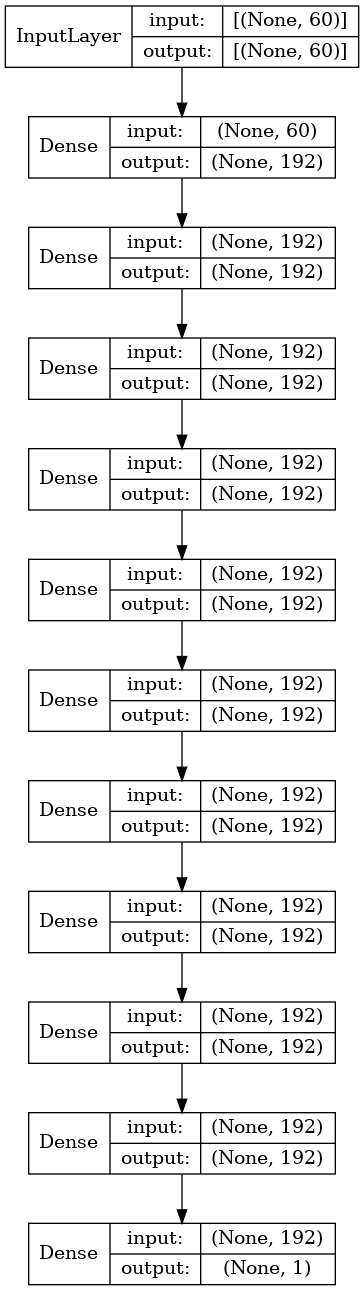

In [25]:

print(best_model.summary())
tf.keras.utils.plot_model(best_model, show_shapes=True,show_layer_names=False)


#  Ensemble Model - Adaboost

## Model

In [17]:

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model= KerasClassifier(model=get_model, epochs=50, batch_size=2048, verbose=1)

ada_model = AdaBoostClassifier(estimator=model, n_estimators=10, random_state=42, algorithm='SAMME')

# pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', ada_model)])




## Training

In [18]:

# pipeline.fit(X_train, y_train)

ada_model.fit(X_train, y_train)


Epoch 1/100
121/121 [==============================] - 3s 15ms/step - loss: 2.8023e-06 - accuracy: 0.5397
Epoch 2/100
121/121 [==============================] - 2s 14ms/step - loss: 2.6020e-06 - accuracy: 0.6244
Epoch 3/100
121/121 [==============================] - 2s 14ms/step - loss: 2.4030e-06 - accuracy: 0.6777
Epoch 4/100
121/121 [==============================] - 2s 14ms/step - loss: 2.2333e-06 - accuracy: 0.7129
Epoch 5/100
121/121 [==============================] - 2s 14ms/step - loss: 2.1078e-06 - accuracy: 0.7361
Epoch 6/100
121/121 [==============================] - 2s 14ms/step - loss: 2.0159e-06 - accuracy: 0.7535
Epoch 7/100
121/121 [==============================] - 2s 14ms/step - loss: 1.9419e-06 - accuracy: 0.7667
Epoch 8/100
121/121 [==============================] - 2s 14ms/step - loss: 1.8789e-06 - accuracy: 0.7765
Epoch 9/100
121/121 [==============================] - 2s 15ms/step - loss: 1.8295e-06 - accuracy: 0.7851
Epoch 10/100
121/121 [========================

AdaBoostClassifier(algorithm='SAMME',
                   estimator=KerasClassifier(batch_size=2048, epochs=100, model=<function get_model at 0x7fbb88490820>),
                   n_estimators=10, random_state=42)

## Save

In [19]:
joblib.dump(ada_model, '../model/ember_model_adaboost_pca.joblib')

INFO:tensorflow:Assets written to: ram://bcbaa4f12fb64c1ca8730ee900be3b93/assets


INFO:tensorflow:Assets written to: ram://bcbaa4f12fb64c1ca8730ee900be3b93/assets


INFO:tensorflow:Assets written to: ram://4cd752a832cb46b49f0cb0ddfd871efa/assets


INFO:tensorflow:Assets written to: ram://4cd752a832cb46b49f0cb0ddfd871efa/assets


INFO:tensorflow:Assets written to: ram://5b63748ab03d4f52902d00de6e9eb328/assets


INFO:tensorflow:Assets written to: ram://5b63748ab03d4f52902d00de6e9eb328/assets


INFO:tensorflow:Assets written to: ram://2e35c57ab2324df58460eb5a52be3f09/assets


INFO:tensorflow:Assets written to: ram://2e35c57ab2324df58460eb5a52be3f09/assets


INFO:tensorflow:Assets written to: ram://f4af6196dd084232811608b269220bdd/assets


INFO:tensorflow:Assets written to: ram://f4af6196dd084232811608b269220bdd/assets


INFO:tensorflow:Assets written to: ram://2ae5a879aeee428a917d47acf68ffd34/assets


INFO:tensorflow:Assets written to: ram://2ae5a879aeee428a917d47acf68ffd34/assets


INFO:tensorflow:Assets written to: ram://c3656765dfe841bd91b874283e440fd8/assets


INFO:tensorflow:Assets written to: ram://c3656765dfe841bd91b874283e440fd8/assets


INFO:tensorflow:Assets written to: ram://a4451a3c75bf49248c54a12b5241a20e/assets


INFO:tensorflow:Assets written to: ram://a4451a3c75bf49248c54a12b5241a20e/assets


INFO:tensorflow:Assets written to: ram://d21c5ab88a6b4c4b97cf7ff7d34aa8e5/assets


INFO:tensorflow:Assets written to: ram://d21c5ab88a6b4c4b97cf7ff7d34aa8e5/assets


INFO:tensorflow:Assets written to: ram://85332ace76b14c338f7c665a730c9e92/assets


INFO:tensorflow:Assets written to: ram://85332ace76b14c338f7c665a730c9e92/assets


['../model/ember_model_adaboost_pca.joblib']

## Load model

In [ ]:
model = joblib.load('../model/ember_model_adaboost.joblib')

## Predict

In [20]:
y_pred = ada_model.predict(X_test)

22/54 [===========>..................] - ETA: 0s

54/54 [==============================] - 0s 3ms/step


## Graphs

### Confusion Matrix


0.8621587065533782


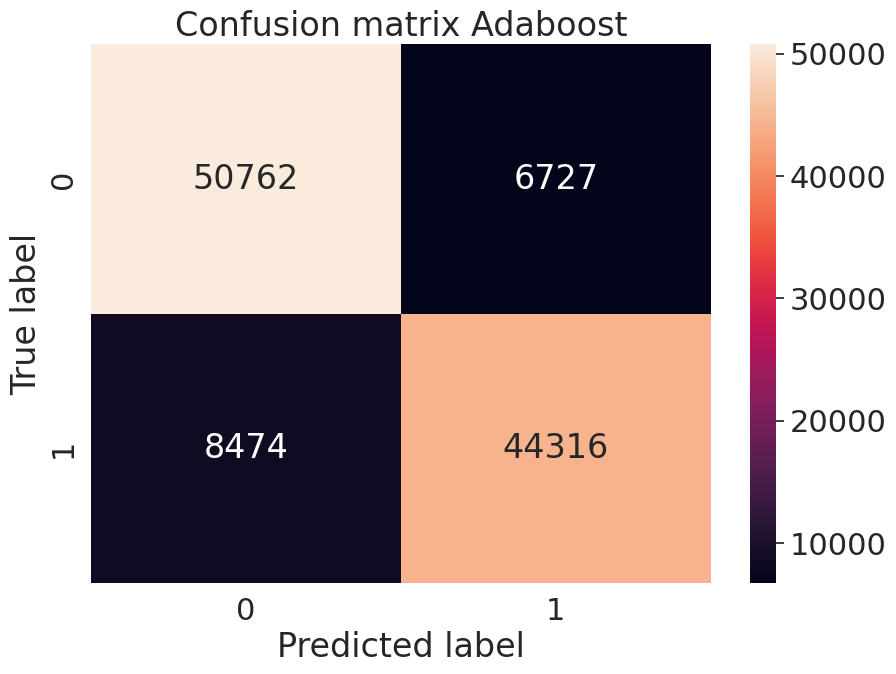

In [56]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    sns.set(font_scale=2)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix Adaboost')



In [30]:
classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87     57489\n           1       0.87      0.84      0.85     52790\n\n    accuracy                           0.86    110279\n   macro avg       0.86      0.86      0.86    110279\nweighted avg       0.86      0.86      0.86    110279\n'

In [31]:
print('              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86     57489\n           1       0.86      0.83      0.84     52790\n\n    accuracy                           0.85    110279\n   macro avg       0.85      0.85      0.85    110279\nweighted avg       0.85      0.85      0.85    110279\n')

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     57489
           1       0.86      0.83      0.84     52790

    accuracy                           0.85    110279
   macro avg       0.85      0.85      0.85    110279
weighted avg       0.85      0.85      0.85    110279



### Learning curves

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1,n_iter=10)
# plt.plot(train_sizes,np.mean(train_scores,axis=1))


# XGBoost

In [6]:
# write code for xgboost
xgb = XGBClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)
xgb.fit(X_train, y_train)


[06:42:15] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "verbose", "warm_start" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=50, num_parallel_tree=None,
              predictor=None, ...)

In [7]:
#predict
y_pred = xgb.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9170376953001025


# CNN


## Model

In [43]:

def get_cnn_model(input_shape):
    input_shape = (input_shape, 1)

    model = Sequential()
    model.add(Conv1D(128, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    # model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01)))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))

    # model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01)))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))

    # max pooling and then flatten
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
    model.add(Flatten())

    # fully connected layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model summary
    print(model.summary())

    return model

model_cnn =get_cnn_model(X_train.shape[1])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 30, 128)           1024      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 128)           512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 30, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 15, 128)           0         
 g1D)                                                            
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                     

In [40]:
import visualkeras
visualkeras.layered_view(model_cnn).show() # display using your system viewer
# visualkeras.layered_view(model_cnn, to_file='output.png') # write to disk
# visualkeras.layered_view(model_cnn, to_file='output.png').show() # write and show

visualkeras.layered_view(model_cnn)

TypeError: 'int' object is not iterable

In [44]:
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=2048)


Epoch 1/60
121/121 [==============================] - 5s 22ms/step - loss: 0.4740 - accuracy: 0.7763 - val_loss: 0.5599 - val_accuracy: 0.8535
Epoch 2/60
121/121 [==============================] - 2s 19ms/step - loss: 0.3310 - accuracy: 0.8610 - val_loss: 0.4551 - val_accuracy: 0.8712
Epoch 3/60
121/121 [==============================] - 2s 19ms/step - loss: 0.2922 - accuracy: 0.8784 - val_loss: 0.3431 - val_accuracy: 0.8901
Epoch 4/60
121/121 [==============================] - 2s 19ms/step - loss: 0.2746 - accuracy: 0.8868 - val_loss: 0.2822 - val_accuracy: 0.8936
Epoch 5/60
121/121 [==============================] - 2s 19ms/step - loss: 0.2690 - accuracy: 0.8897 - val_loss: 0.2455 - val_accuracy: 0.9028
Epoch 6/60
121/121 [==============================] - 2s 19ms/step - loss: 0.2551 - accuracy: 0.8965 - val_loss: 0.2370 - val_accuracy: 0.9044
Epoch 7/60
121/121 [==============================] - 2s 19ms/step - loss: 0.2507 - accuracy: 0.8980 - val_loss: 0.2297 - val_accuracy: 0.9093

In [45]:
y_prediction = model_cnn.predict(X_test)


3447/3447 [==============================] - 6s 2ms/step


In [47]:
threshold = 0.5
y_pred_real = np.where(y_prediction >threshold,1,0)
y_pred_real

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

## Accuracy

In [46]:
# evaluate the model
loss, accuracy = model_cnn.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

  18/3447 [..............................] - ETA: 10s - loss: 38.6590 - accuracy: 0.8628

3447/3447 [==============================] - 9s 3ms/step - loss: 5.0991 - accuracy: 0.8632
Accuracy: 0.8631924390792847
Loss: 5.099113941192627


## Graphs

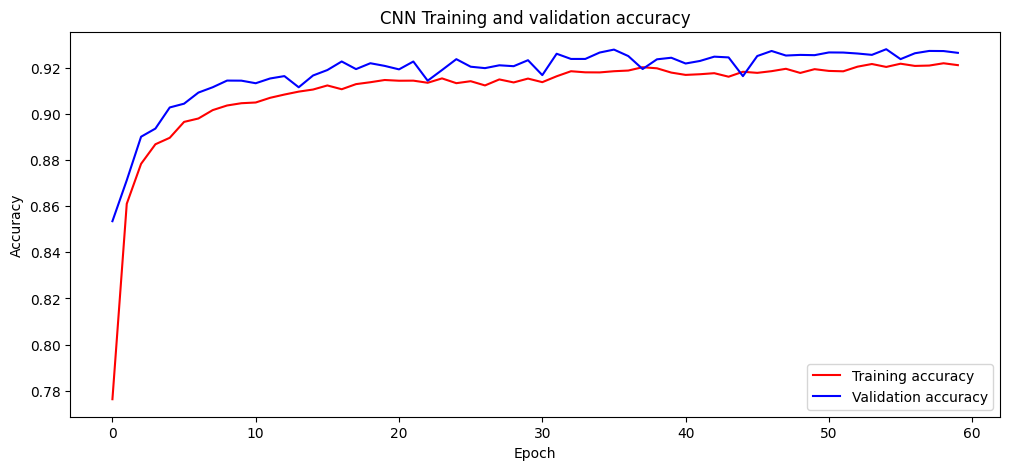

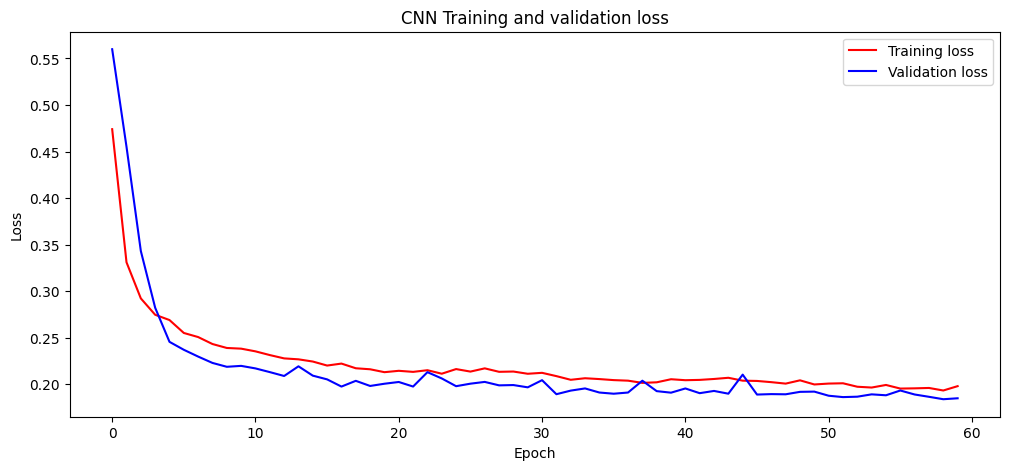

In [48]:

# def plot_training_history(history, model_name):
#     plt.figure(figsize=(12, 5))

#     # Plot accuracy
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.title(f'{model_name} Training and Validation Accuracy')

#     # Plot loss
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title(f'{model_name} Training and Validation Loss')

#     plt.tight_layout()
#     plt.show()


# #get training loss
# print(history.history.keys())
# train_loss = history.history['loss']
# train_accurary = history.history['accuracy']
# #get validation data
# val_loss = history.history['val_loss']
# val_accurary = history.history['val_accuracy']

# #plot graph
# # plt.figure().set_figwidth(7)
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')


# plt.legend()
# plt.show()


def plot_training_accuracy(history, model_name):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(train_accuracy))
    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title(f'{model_name} Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=0)
    plt.show()

plot_training_accuracy(history_cnn, 'CNN')

    

def plot_training_loss(history, model_name):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(train_loss))
    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc=0)
    plt.show()

plot_training_loss(history_cnn, 'CNN')

    # save the plots
    # plt.savefig(f'plots/{model_name}_training_history.png')


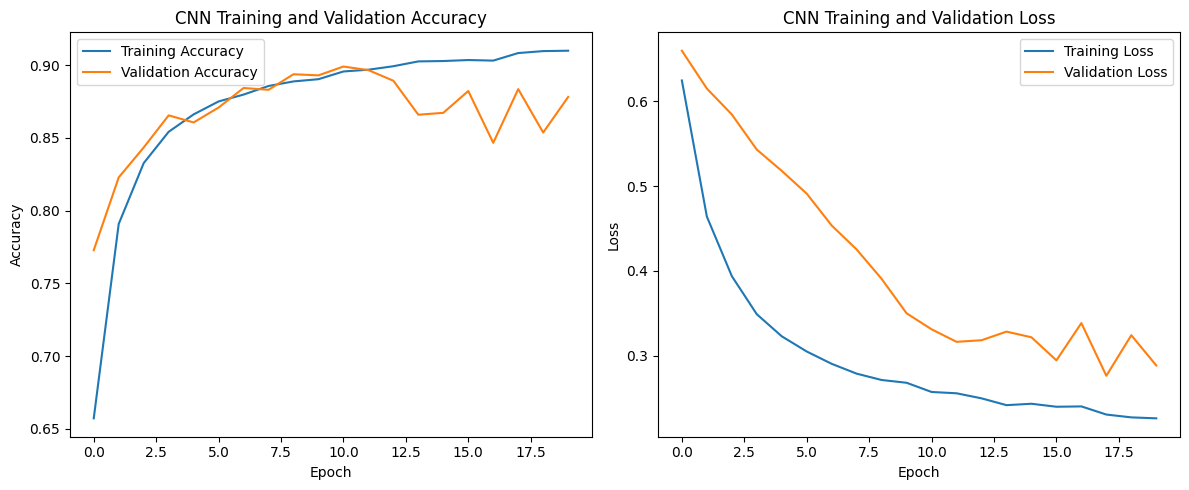

In [41]:
plot_training_history(history_cnn, 'CNN')

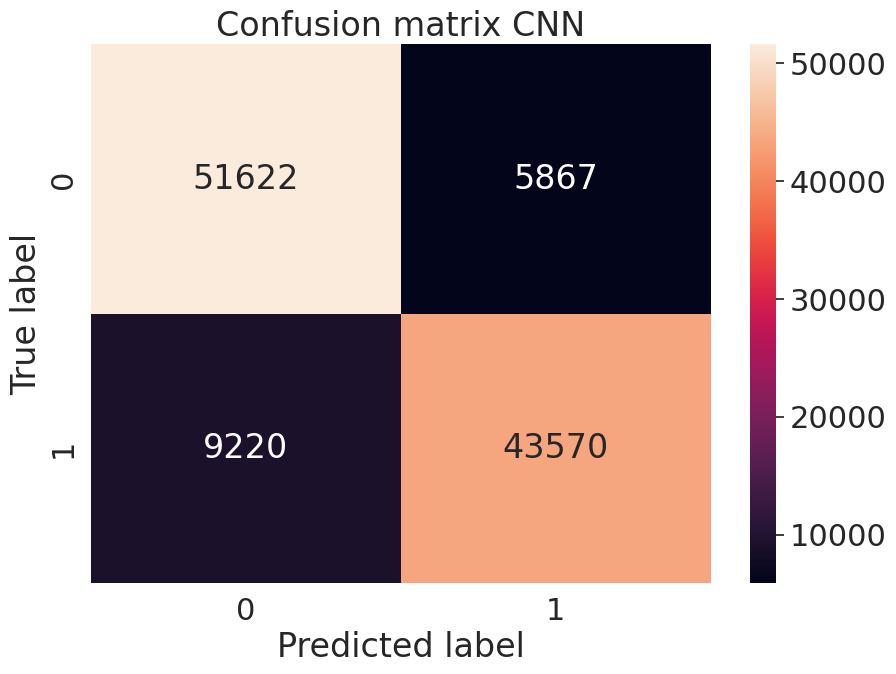

In [53]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    sns.set(font_scale=2)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
plot_confusion_matrix(y_test, y_pred_real, labels=[0, 1], title='Confusion matrix CNN')

In [50]:
# print classification report
print(classification_report(y_test,y_pred_real))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     57489
           1       0.88      0.83      0.85     52790

    accuracy                           0.86    110279
   macro avg       0.86      0.86      0.86    110279
weighted avg       0.86      0.86      0.86    110279

